In [130]:
import pandas as pd
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

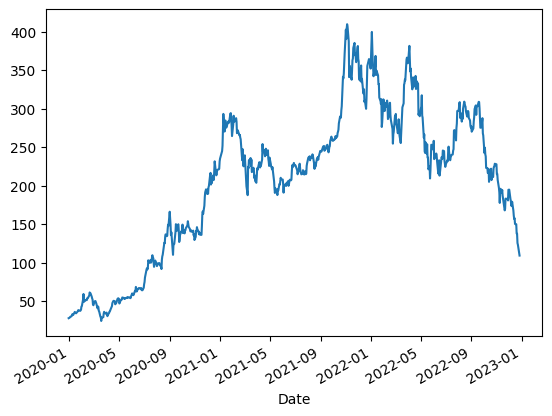

In [131]:
df = yf.download("TSLA", period = "3y") # windowsize
df["Close"].plot()

using window size 151


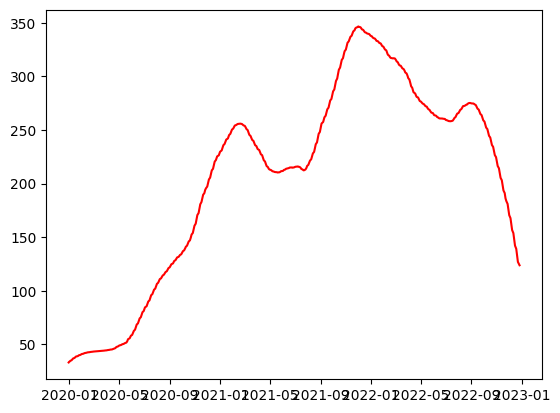

In [132]:
from scipy.signal import savgol_filter, argrelextrema
import numpy as np
import matplotlib.pyplot as plt

windowsize = int(len(df) / 5) # 151 turned out to be quite good
print(f"using window size {windowsize}")
yhat = savgol_filter(df["Close"], windowsize, 3) # window size 51, polynomial order 3
plt.plot(df.index, yhat, color='red')

In [133]:
## get minima maxima,
maxima = argrelextrema(yhat, np.greater)[0]
minima = argrelextrema(yhat, np.less)[0]

newMinima = []
newMaxima = []
signal = []

# we need an initial guess at the breakpoints, so 
num_breakpoints = 0
minimumDistance = len(df) / 15
crntDistance = 0
# set last signal
min_min = min(minima)
min_max = min(maxima)
if min_min < min_max:
    lastSignal = -1
elif min_min > min_max:
    lastSignal = 1
    
for i in range(len(df)):
    if (i in minima or i in maxima) and crntDistance > minimumDistance:
        if i in minima and lastSignal == -1:
            newMinima.append(i)
            lastSignal = 1 # because we have been at minima, moving to maxima
            num_breakpoints += 1
            crntDistance = 0
        elif i in maxima and lastSignal == 1:
            newMaxima.append(i)
            lastSignal = -1 # because we have been at maxima, moving to minima
            num_breakpoints += 1
            crntDistance = 0
            
    crntDistance += 1
    signal.append(lastSignal)
    
print(num_breakpoints)
df["signal"] = signal

5


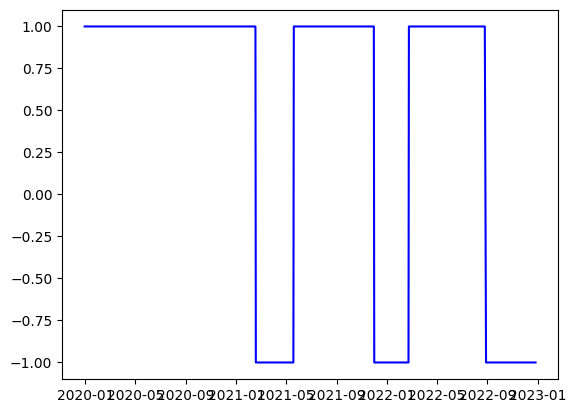

In [134]:
plt.plot(df.index, signal, color='blue')

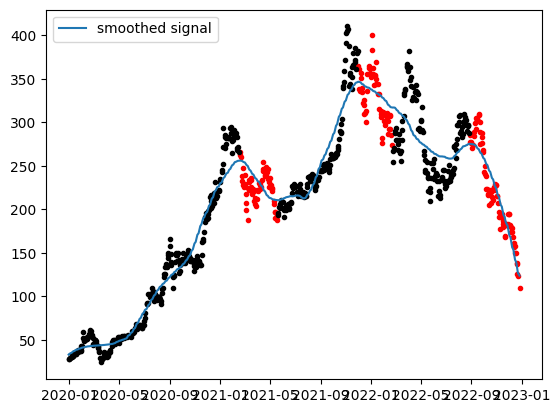

In [135]:
reds = df[df["signal"] == -1]
blacks = df[df["signal"] == 1]

plt.plot(reds["Close"], "r.")
plt.plot(blacks["Close"], "k.")
plt.plot(df.index, yhat, label="smoothed signal")
# plt.plot(df.index, df["Close"],"--k", label="original signal")
plt.legend()